<a href="https://colab.research.google.com/github/VivekParmar20/Assignment1/blob/main/tmain_assignmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir data


In [ ]:
!unzip data/archive.zip -d data/

Archive:  data/archive.zip
replace data/the weather of 155 countries in 2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/the weather of 155 countries in 2020.csv')
df.head()

<ipython-input-2-4a0b852c579a>:1: DtypeWarning: Columns (15,16,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/the weather of 155 countries in 2020.csv')


,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'SNOW', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
       'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'],
      dtype='object')

In [ ]:
df.shape

(1026119, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026119 entries, 0 to 1026118
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STATION          1026119 non-null  object 
 1   Country/Region   1026119 non-null  object 
 2   DATE             1026119 non-null  object 
 3   Year             1026119 non-null  int64  
 4   Month            1026119 non-null  int64  
 5   Day              1026119 non-null  int64  
 6   PRCP             718382 non-null   float64
 7   SNWD             214350 non-null   float64
 8   TAVG             789773 non-null   float64
 9   TMAX             652635 non-null   float64
 10  TMIN             680160 non-null   float64
 11  SNOW             103991 non-null   float64
 12  LATITUDE         102307 non-null   float64
 13  LONGITUDE        102307 non-null   float64
 14  ELEVATION        102307 non-null   float64
 15  PRCP_ATTRIBUTES  6007 non-null     object 
 16  TAVG_ATTRIBUTES  3

In [ ]:
country=df['Country/Region'].unique()
weather_df=df.drop(['Year','PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES',
                    'TMIN_ATTRIBUTES','DAPR','MDPR','WESD','SNWD_ATTRIBUTES'],axis=1)

In [ ]:
weather_df.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP              307737
SNWD              811769
TAVG              236346
TMAX              373484
TMIN              345959
SNOW              922128
LATITUDE          923812
LONGITUDE         923812
ELEVATION         923812
dtype: int64

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026119 entries, 0 to 1026118
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   STATION         1026119 non-null  object 
 1   Country/Region  1026119 non-null  object 
 2   DATE            1026119 non-null  object 
 3   Month           1026119 non-null  int64  
 4   Day             1026119 non-null  int64  
 5   PRCP            718382 non-null   float64
 6   SNWD            214350 non-null   float64
 7   TAVG            789773 non-null   float64
 8   TMAX            652635 non-null   float64
 9   TMIN            680160 non-null   float64
 10  SNOW            103991 non-null   float64
 11  LATITUDE        102307 non-null   float64
 12  LONGITUDE       102307 non-null   float64
 13  ELEVATION       102307 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 109.6+ MB


In [ ]:
weather_df_copy = weather_df.copy()
average_temp = weather_df_copy.groupby(['Country/Region','Month'])['TAVG'].mean().to_dict()
average_temp_min = weather_df_copy.groupby(['Country/Region','Month'])['TMIN'].mean().to_dict()
average_temp_max = weather_df_copy.groupby(['Country/Region','Month'])['TMAX'].mean().to_dict()

print(len(average_temp_min))
print(len(average_temp_max))
print(len(average_temp))

1082
1082
1082


In [ ]:
def fill_missing_avg_temp(row,temp_type):
    key = (row['Country/Region'], row['Month'])
    if(temp_type == 'TAVG'):
      return average_temp.get(key, row[temp_type])
    elif(temp_type == 'TMIN'):
      return average_temp_min.get(key, row[temp_type])
    else:
      return average_temp_max.get(key, row[temp_type])


weather_df_copy['TAVG'] = weather_df_copy.apply(fill_missing_avg_temp, args=['TAVG'] ,axis = 1)
weather_df_copy['TMIN'] = weather_df_copy.apply(fill_missing_avg_temp, args=['TMIN'] ,axis = 1)
weather_df_copy['TMAX'] = weather_df_copy.apply(fill_missing_avg_temp, args=['TMAX'] ,axis = 1)

weather_df_copy.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP              307737
SNWD              811769
TAVG                   0
TMAX               16510
TMIN               13297
SNOW              922128
LATITUDE          923812
LONGITUDE         923812
ELEVATION         923812
dtype: int64

In [ ]:
weather_df_copy=weather_df_copy.dropna(subset=['TMIN','TMAX'])
weather_df_copy.isnull().sum()
total_rows=weather_df_copy.shape[0]
print(total_rows)

1009465


In [ ]:
total_rows=len(df['TAVG'])
print(total_rows)

1026119


In [ ]:
weather_df_copy.isnull().sum()


STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP              292181
SNWD              795135
TAVG                   0
TMAX                   0
TMIN                   0
SNOW              905474
LATITUDE          907426
LONGITUDE         907426
ELEVATION         907426
dtype: int64

<ipython-input-14-03b1d6e78df9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_df.corr(),annot=True);


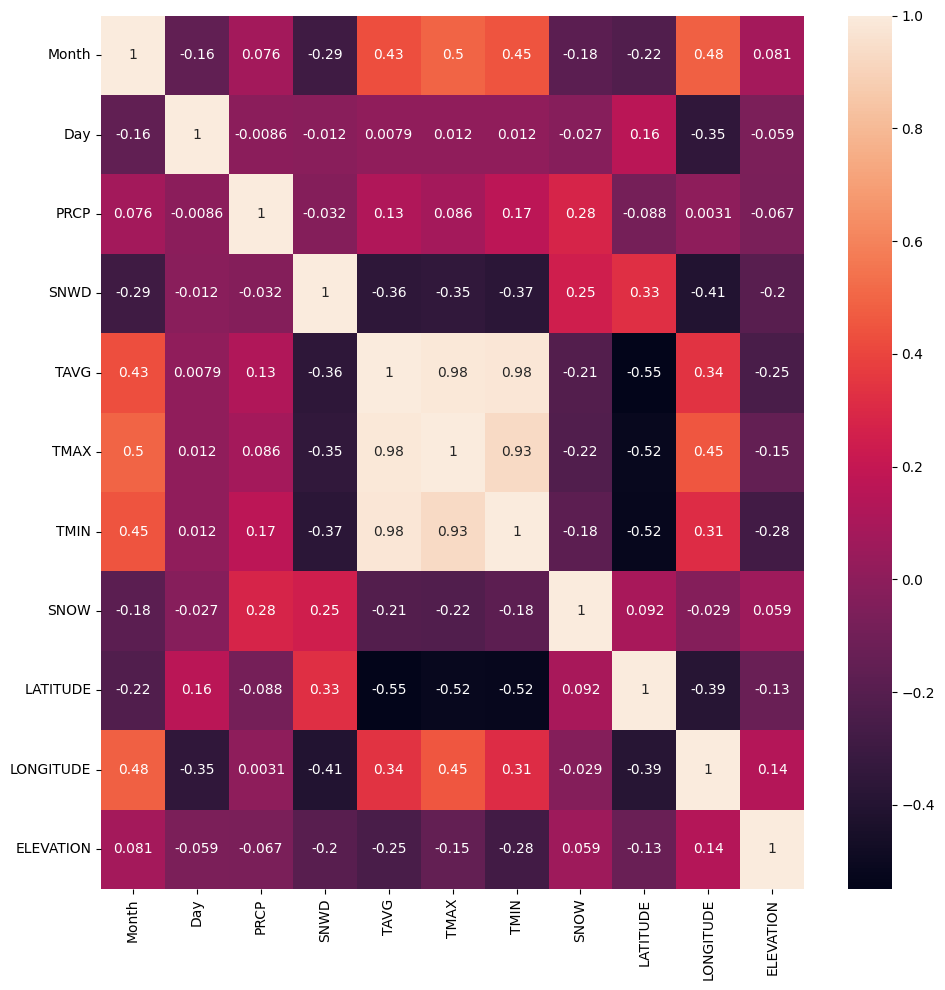

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(weather_df.corr(),annot=True);
plt.tight_layout()

In [ ]:
skidding_and_overturning= weather_df_copy["TMAX"].value_counts()
skidding_and_overturning

15.199033    43798
20.529790    43508
6.877496     40722
0.438619     40195
23.512719    35169
             ...  
16.425000       10
31.214286       10
32.450000        6
29.866667        3
32.500000        1
Name: TMAX, Length: 814, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026119 entries, 0 to 1026118
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STATION          1026119 non-null  object 
 1   Country/Region   1026119 non-null  object 
 2   DATE             1026119 non-null  object 
 3   Year             1026119 non-null  int64  
 4   Month            1026119 non-null  int64  
 5   Day              1026119 non-null  int64  
 6   PRCP             718382 non-null   float64
 7   SNWD             214350 non-null   float64
 8   TAVG             789773 non-null   float64
 9   TMAX             652635 non-null   float64
 10  TMIN             680160 non-null   float64
 11  SNOW             103991 non-null   float64
 12  LATITUDE         102307 non-null   float64
 13  LONGITUDE        102307 non-null   float64
 14  ELEVATION        102307 non-null   float64
 15  PRCP_ATTRIBUTES  6007 non-null     object 
 16  TAVG_ATTRIBUTES  3

In [ ]:
weather_df_copy.isnull().sum()

weather_df_copy = weather_df_copy.dropna(subset=['TMIN','TMAX'])

# columns_to_drop = ['SNOW', 'LATITUDE','LONGITUDE','ELEVATION', 'SNWD','PRCP']
# weather_df_copy = weather_df_copy.drop(columns=columns_to_drop)

weather_df_copy.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP              292181
SNWD              795135
TAVG                   0
TMAX                   0
TMIN                   0
SNOW              905474
LATITUDE          907426
LONGITUDE         907426
ELEVATION         907426
dtype: int64

In [ ]:
import statistics
from sklearn.preprocessing import LabelEncoder
countries = weather_df_copy['Country/Region']
label_encoder = LabelEncoder()
encoded_countries = label_encoder.fit_transform(countries)
weather_df_copy['Country/Region'] = encoded_countries

<ipython-input-19-7b034d74351c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=new_df.corr(), lw = 1)


<Axes: >

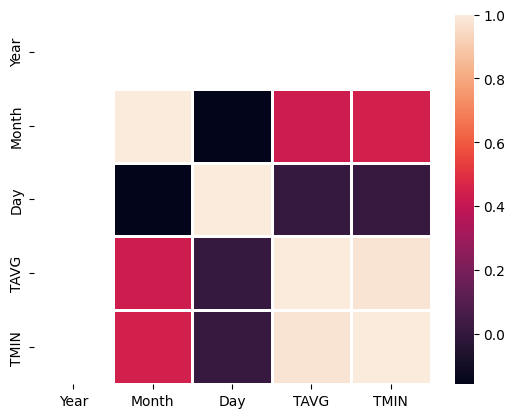

In [ ]:
new_df=df[["Country/Region","Year","Month","Day", "TAVG", "TMIN"]]
sns.heatmap(data=new_df.corr(), lw = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(weather_df_copy[["Country/Region","Month","Day","TAVG","TMIN"]], weather_df_copy["TMAX"], test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"R-squared (R²): {r2}")

MAE: 0.7804580165503157
RMSE: 1.2133226014751315
R-squared (R²): 0.9893696089443093


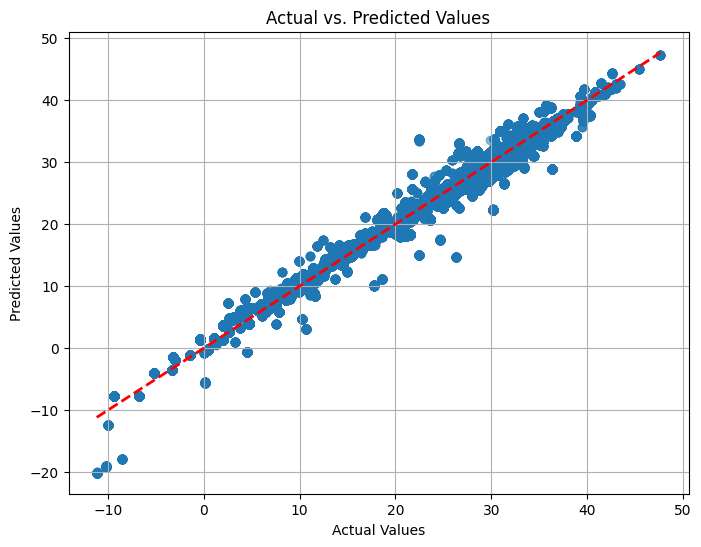

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

In [ ]:
from sklearn import preprocessing


In [ ]:
weather_df_copy.columns

Index(['STATION', 'Country/Region', 'DATE', 'Month', 'Day', 'PRCP', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'SNOW', 'LATITUDE', 'LONGITUDE', 'ELEVATION'],
      dtype='object')

In [ ]:
data_df = weather_df_copy[["Country/Region","Month", "Day", "TAVG", "TMIN"]]
data_df.head()

,Country/Region,Month,Day,TAVG,TMIN
0,30,1,22,24.44,21.847059
1,30,1,23,24.44,21.847059
2,30,1,24,24.44,21.847059
3,30,1,25,24.44,21.847059
4,30,1,26,24.44,21.847059


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, weather_df_copy["TMAX"], random_state=42, test_size=0.20)

In [ ]:
X_train

,Country/Region,Month,Day,TAVG,TMIN
258144,101,5,12,29.624528,26.500000
28086,131,6,16,21.665602,15.227464
939119,26,5,26,8.747036,2.964701
823376,26,3,1,-5.575132,-10.457274
24562,131,6,19,21.665602,15.227464
...,...,...,...,...,...
265683,22,7,1,23.534275,16.991411
374562,110,3,18,-2.952682,-8.647060
138437,84,4,10,28.701831,21.932333
685960,45,2,9,1.625369,-0.835935


In [ ]:
y_train

258144    38.820000
28086     28.093220
939119    15.199033
823376     0.438619
24562     28.093220
            ...    
265683    31.767488
374562     2.619310
138437    35.008034
685960     3.779787
128463    28.609619
Name: TMAX, Length: 807572, dtype: float64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807572 entries, 258144 to 128463
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country/Region  807572 non-null  int64  
 1   Month           807572 non-null  int64  
 2   Day             807572 non-null  int64  
 3   TAVG            807572 non-null  float64
 4   TMIN            807572 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 37.0 MB


In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((807572, 5), (201893, 5))

In [ ]:
X_train_scaled

array([[ 0.89622888,  0.40380027, -0.4465102 ,  1.49461553,  1.72992839],
       [ 1.65826791,  0.9566452 ,  0.00983643,  0.80107203,  0.73292353],
       [-1.00886868,  0.40380027,  1.15070301, -0.32465621, -0.35166235],
       ...,
       [ 0.46440677, -0.14904466, -0.67468351,  1.41421134,  1.32593889],
       [-0.52624397, -1.25473452, -0.78877017, -0.94524063, -0.68781146],
       [ 0.46440677, -1.25473452, -0.78877017,  0.80966669,  0.69660785]])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    #'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 1.2244411187601956 {}
RandomForestRegressor 0.43147229230561057 {'max_depth': 9, 'n_estimators': 15}
Best model:  RandomForestRegressor(max_depth=9, n_estimators=15, random_state=42)


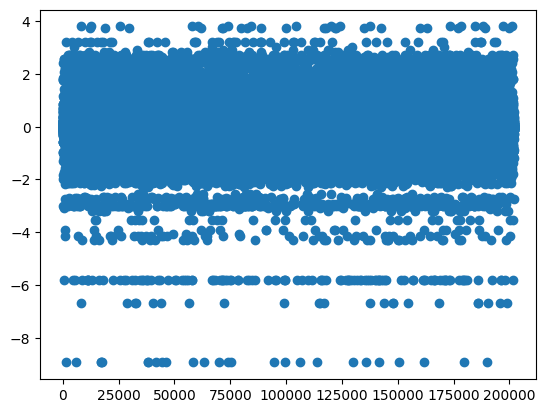

In [ ]:
model_results = eval_models()

In [ ]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,1.224441,1.221318,0.783775,0.783055,{}
RandomForestRegressor,0.431472,0.435097,0.148492,0.149569,"{'max_depth': 9, 'n_estimators': 15}"


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(model_results, *['Train_RMSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(model_results, *['Test_RMSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(model_results, *['Train_MAE'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(model_results, *['Test_MAE'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(model_results, *['Train_RMSE', 'Test_RMSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(model_results, *['Test_RMSE', 'Train_MAE'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(model_results, *['Train_MAE', 'Test_MAE'], **{})
chart

We haveve conducted a data analysis on weather data. Here's a brief discussion of what we did:

    Data Splitting: We started by splitting our dataset into training and testing sets using the train_test_split function from scikit-learn. This is a common step in machine learning to evaluate the performance of models.

    Data Scaling: We used the StandardScaler from scikit-learn to standardize our features. Standardization is important for many machine learning algorithms as it helps ensure that features are on the same scale.

    Model Selection: We created a dictionary called model_dict that contains several regression models, including Linear Regression and RandomForestRegressor. Each model is associated with a set of hyperparameters to be tuned.

    Model Evaluation: We defined a function eval_models to evaluate each model. Inside this function, We used GridSearchCV to perform hyperparameter tuning for each model. This technique tries different combinations of hyperparameters to find the best-performing model.

    Model Metrics: We calculated and recorded various regression metrics for each model, such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). These metrics are used to assess how well your models are performing on both the training and testing datasets.

    Best Model Selection:We selected the best model based on the test RMSE (Root Mean Squared Error). The model with the lowest test RMSE was considered the best.

    Visualization: We plotted the prediction errors using the best model to visualize how well it performed on the test data.

    Data Preprocessing: Before starting with model evaluation, We performed some data preprocessing steps. We computed the average temperature (TAVG), minimum temperature (TMIN), and maximum temperature (TMAX) for each country/region and month combination. This likely helped in filling missing values in our dataset, ensuring that temperature data was more complete and consistent.

    Data Cleanup: We dropped unnecessary columns from our dataset, which can help reduce noise and improve model performance.

    Data Analysis: We provided information about the columns in our original dataset, including the features and attributes.

    Missing Data Handling: We addressed missing data in the TMIN and TMAX columns by filling them with the average values calculated for each country/region and month combination. This approach helps retain as much data as possible while handling missing values appropriately.

    Data Quality Check:We checked for missing values in our dataset after the filling operation to ensure that there are no remaining NaN values.

Overall, our project involved data preprocessing, feature engineering, model selection, hyperparameter tuning, and model evaluation. The goal is to develop a regression model to predict maximum temperatures (TMAX) based on the given weather data features. The RandomForestRegressor model with specific hyperparameters (max_depth: 9, n_estimators: 15) performed the best according to the test RMSE metric